# **Analisis Predcitivo - Examen 2**

El objetivo de este examen es predecir el precio de un auto nuevo.

## **Analisis Exploratorio de Datos**



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn import neural_network
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [2]:
val = pd.read_csv('base_val.csv')

In [3]:
base = pd.read_csv('base_train.csv')

In [ ]:
print(base.head(5))

In [5]:
print('Cantidad de Filas y columnas:',base.shape)
print('Nombre columnas:',base.columns)

Cantidad de Filas y columnas: (800000, 17)
Nombre columnas: Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [6]:
print(base)

        Unnamed: 0  symboling  normalized-losses  wheel-base      length  \
0                0          0         145.906176   90.576742  164.257910   
1                1         -1          92.733744  105.905393  187.256268   
2                2          0          87.620269   96.992974  172.988044   
3                3          2         107.851112   96.083754  166.746214   
4                4          3         149.361994   99.346480  178.441091   
...            ...        ...                ...         ...         ...   
799995      799995          0          83.658143   94.464635  164.668036   
799996      799996          1         145.538826   96.587627  172.323536   
799997      799997          3         104.694181   94.673035  147.452392   
799998      799998         -1         124.292164  106.041770  191.237718   
799999      799999          0          88.213204   95.375944  169.304371   

            width     height  curb-weight  engine-size      bore    stroke  \
0       6

In [ ]:
base.dtypes

In [ ]:
base.info()

In [ ]:
base.isnull().sum()

In [ ]:
base.duplicated().sum()

In [ ]:
base.describe()

In [ ]:
a4_dims = (25, 20)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=base,linewidth=2.5,ax=ax)
g.set_yscale("log")

**Visualización**

Distribución de la variable target

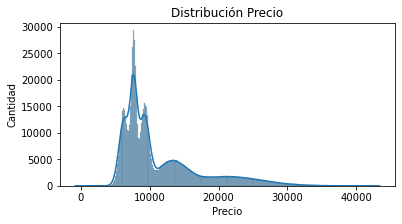

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=base, x='price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_ylabel('Cantidad')
ax.set_xlabel('Precio');

Gráfico de distribución para cada variable numérica

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = base.select_dtypes(include=['float64']).columns
columnas_numeric = columnas_numeric.drop('price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = base,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, 
             fontweight = "bold");

--------------------------------------------------------------------------------------

## **Partición**

In [4]:
X= base[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width','height','curb-weight', 'engine-size', 
'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']]
y= base[['price']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640000, 15)
(160000, 15)
(640000, 1)
(160000, 1)


In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(560000, 15)
(240000, 15)
(560000, 1)
(240000, 1)


In [100]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=42)

In [101]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(680000, 15)
(120000, 15)
(680000, 1)
(120000, 1)


---------------------------------------------------------------------------------

## **Modelos**

**Regresión Lineal**

**Arbol de Decisión**

In [16]:
arbol = DecisionTreeRegressor(random_state= 0 ,max_depth=10).fit(X_train,y_train)

In [17]:
arbol.score(X_train,y_train)

0.6131490519480514

In [18]:
arbol.score(X_test,y_test)

0.5938075068197454

In [19]:
print("R-Squared on train dataset = {}".format(arbol.score(X_train,y_train)))
print("R-Squared on test dataset = {}".format(arbol.score(X_test,y_test)))

R-Squared on train dataset = 0.6131490519480514
R-Squared on test dataset = 0.5938075068197454


Evalución del arbol:

In [22]:
pred=arbol.predict(X_test)

In [23]:
pred = pd.DataFrame(pred)
y_test['result'] = pred

In [24]:
y_test['price'] = y_test['price'].reset_index(drop=True)

In [25]:
y_test = y_test.dropna()
y_test.head(10)

,price,result
212188,6533.813328,7382.389755
138859,16469.431901,11817.457306
53867,7064.575191,6114.013474
220424,9527.344955,13588.462200
221365,7931.836365,9413.035334
186184,8963.288348,8748.325735
13118,5784.521078,6043.774584
209303,7814.792130,7168.361167
108492,8207.335199,7383.618757
82329,11571.941651,15717.202123


In [26]:
print('MAE', metrics.mean_absolute_error(y_test['price'],y_test['result']))
print('MSE', metrics.mean_squared_error(y_test['price'],y_test['result']))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test['price'],y_test['result'])))

MAE 3062.0886494861693
MSE 24880985.28194696
RMSE 4988.084329875244


Visualización de Arbol:

In [27]:
print(f"Profundidad del árbol: {arbol.get_depth()}")
print(f"Número de nodos terminales: {arbol.get_n_leaves()}")

Profundidad del árbol: 66
Número de nodos terminales: 560000


In [ ]:
tree.plot_tree(arbol)
plt.show()

**Arbol con Hiperparametros**

Hiperparametros:

In [35]:
parametros_arbol={"splitter":["best","random"],
            "max_depth" : [2,4,6,8,10],
           "min_samples_leaf":[2,4,6,8,10],
           "min_weight_fraction_leaf":[0.2,0.4,0.6,0.8],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,20,40,60,80,90] }

In [36]:
modelo = DecisionTreeRegressor()
grid =GridSearchCV(modelo,param_grid=parametros_arbol,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [38]:
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)

Best Score: -20831156.601065848
Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [39]:
arbol = DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes= None, min_samples_leaf= 5, min_weight_fraction_leaf= 0.1, splitter= 'best').fit(X_train,y_train)

In [40]:
arbol.score(X_train,y_train)

0.3974683187820107

In [ ]:
arbol.score(X_test,y_test)

In [44]:
pred_arbol=arbol.predict(X_test)

In [ ]:
plt.scatter(y_test,pred_arbol)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_arbol))
print('MSE:', metrics.mean_squared_error(y_test, pred_arbol))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_arbol)))

Arbol de Decision con otra proporcion de particion

In [33]:
arbol2 = DecisionTreeRegressor(random_state= 0, max_depth=20).fit(X_train2,y_train2)
print("R-Squared on train dataset = {}".format(arbol2.score(X_train2,y_train2)))
print("R-Squared on test dataset = {}".format(arbol2.score(X_train2,y_train2)))

R-Squared on train dataset = 0.8924825279124566
R-Squared on test dataset = 0.8924825279124566


In [34]:
parametros_arbol={"splitter":["best","random"],
            "max_depth" : [5,10,15,20],
           "min_samples_leaf":[2,4,6,8,10],
           "min_weight_fraction_leaf":[0.2,0.4,0.6,0.8],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,20,40,60,80,90] }

AdD = DecisionTreeRegressor(random_state= 0)

In [35]:
grid_arbol =GridSearchCV(AdD,parametros_arbol,scoring='neg_mean_squared_error',cv=3,verbose=3).fit(X_train2,y_train2)
print(grid_arbol.best_params_,'\n')
print(grid_arbol.best_estimator_,'\n')
print(grid_arbol.best_score_,'\n')

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-24420864.790 total time=   1.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-24422153.184 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=best;, score=-24442329.594 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-25549526.958 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter=random;, score=-25423127.471 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_sampl

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5760 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lourd\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\Users\lourd\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fracti

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'} 

DecisionTreeRegressor(max_depth=5, max_features='log2', min_samples_leaf=2,
                      min_weight_fraction_leaf=0.2, random_state=0) 

-23975421.725000996 



In [41]:
modelo_arbol = DecisionTreeRegressor(random_state= 0, max_depth=5, max_features="log2",max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.2, splitter="best").fit(X_train,y_train)
print("R-Squared on train dataset = {}".format(modelo_arbol .score(X_train,y_train)))
print("R-Squared on test dataset = {}".format(modelo_arbol.score(X_train,y_train)))

R-Squared on train dataset = 0.30425041366418304
R-Squared on test dataset = 0.30425041366418304


In [42]:
modelo_arbol = DecisionTreeRegressor(random_state= 0, max_depth=20).fit(X_train,y_train)
print("R-Squared on train dataset = {}".format(modelo_arbol .score(X_train,y_train)))
print("R-Squared on test dataset = {}".format(modelo_arbol.score(X_train,y_train)))

R-Squared on train dataset = 0.8881963599431894
R-Squared on test dataset = 0.8881963599431894


Salida de Datos

In [43]:
pred = modelo_arbol.predict(val.iloc[:,1:16])
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("AdD2.csv", sep=',',index=True,  index_label='id')

**Bagging Trees**

In [7]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagging_tree = BaggingRegressor(DecisionTreeRegressor(), max_samples=1.0,bootstrap=True, random_state=42).fit(X_train, y_train)

In [ ]:
bagging_tree.score(X_train,y_train)

In [ ]:
bagging_tree.score(X_test,y_test)

**AdaBoost**

In [23]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=200, random_state=0).fit(X_train, y_train)

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
adaboost.score(X_train, y_train)

-0.1570657220298899

In [25]:
adaboost.score(X_test, y_test)

-0.19183110225104283

**Support Vector Machine**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_svr = GridSearchCV(
       estimator=SVR(kernel='rbf'),
       param_grid={
           'C': [0.1, 1, 100, 1000],
           'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
           'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
       },
       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_svr.fit(X,y)
print(grid_svr.best_params_,'\n')
print(grid_svr.best_estimator_,'\n')
print(grid_svr.best_score_,'\n')

In [ ]:
svr = SVR().fit(X_train,y_train)

In [ ]:
svr.score(X_test,y_test)

# **Hiperparametros en Modelos Multiples**

Ejecuto muchos modelos a la vez para encontrar el mejor modelo que trabaje mejor para el conjunto de datos.

In [9]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    neural_network.MLPRegressor(),
    #SVR(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [10]:
head = 9
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 3.337s
	Prediction time: 19.284s
	Explained variance: 0.40793477066329664
	Mean absolute error: 2944.900985233307
	R2 score: 0.4071833000948274



c:\Users\camil\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()
	Training time: 491.743s
	Prediction time: 0.354s
	Explained variance: 0.607046596900104
	Mean absolute error: 2456.015431168317
	R2 score: 0.6070445634510818



c:\Users\camil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()
	Training time: 5970.726s
	Prediction time: 0.940s
	Explained variance: 0.5424589346411414
	Mean absolute error: 2646.424671861462
	R2 score: 0.542122021602204



C:\Users\camil\AppData\Local\Temp\ipykernel_25804\1870211175.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


ExtraTreesRegressor()
	Training time: 558.539s
	Prediction time: 50.293s
	Explained variance: 0.658708746966858
	Mean absolute error: 2175.0061443633367
	R2 score: 0.6584431860765818



C:\Users\camil\AppData\Local\Temp\ipykernel_25804\1870211175.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()
	Training time: 2235.154s
	Prediction time: 16.512s
	Explained variance: 0.6513340113182069
	Mean absolute error: 2174.1934488092816
	R2 score: 0.6510905110951202

DecisionTreeRegressor()
	Training time: 71.237s
	Prediction time: 0.199s
	Explained variance: 0.2873887809294844
	Mean absolute error: 3014.3763335130684
	R2 score: 0.287151563602722

LinearRegression()
	Training time: 0.544s
	Prediction time: 0.028s
	Explained variance: 0.4817541723460954
	Mean absolute error: 2966.2312423188714
	R2 score: 0.48174048839586037

Lasso()
	Training time: 1.331s
	Prediction time: 0.017s
	Explained variance: 0.48175660534626563
	Mean absolute error: 2966.2756602445033
	R2 score: 0.48174291848776785

Ridge()
	Training time: 0.185s
	Prediction time: 0.021s
	Explained variance: 0.4817541726577136
	Mean absolute error: 2966.231246190666
	R2 score: 0.4817404887068464



*ExtraTree*

In [11]:
extra1 = ExtraTreesRegressor().fit(X_train, y_train)
print("Train Score: {}".format(extra1.score(X_train,y_train)))
print("Test Score: {}".format(extra1.score(X_test,y_test)))

C:\Users\camil\AppData\Local\Temp\ipykernel_3292\2074207769.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees = ExtraTreesRegressor().fit(X_train, y_train)


Train Score: 1.0
Test Score: 0.6577139267945782


In [14]:
ypred = extra1.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))

MSE: 11742819.96
RMSE: 3426.78


In [10]:
extra2 = ExtraTreesRegressor(n_estimators = 200, max_depth= None, random_state=0).fit(X_train, y_train)
print("Train Score: {}".format(extra2.score(X_train,y_train)))
print("Test Score: {}".format(extra2.score(X_test,y_test)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_23324\224130639.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra1 = ExtraTreesRegressor(n_estimators = 200, max_depth= None, random_state=0).fit(X_train, y_train)


Train Score: 1.0
Test Score: 0.6596148203353266


In [6]:
extra3 = ExtraTreesRegressor(n_estimators = 300, max_depth= None, random_state=0).fit(X_train, y_train)
print("Train Score: {}".format(extra3.score(X_train,y_train)))
print("Test Score: {}".format(extra3.score(X_test,y_test)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_5688\1235244352.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra2 = ExtraTreesRegressor(n_estimators = 300, max_depth= None, random_state=0).fit(X_train, y_train)


Train Score: 1.0
Test Score: 0.6605837962631467


In [10]:
extra4 = ExtraTreesRegressor(n_estimators = 1000).fit(X_train, y_train)
print("Train Score: {}".format(extra4.score(X_train,y_train)))
print("Test Score: {}".format(extra4.score(X_test,y_test)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_13388\773980234.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra2 = ExtraTreesRegressor(n_estimators = 1000).fit(X_train, y_train)


Train Score: 1.0
Test Score: 0.6613231611920366


In [17]:
extra5 = ExtraTreesRegressor(n_estimators = 300).fit(X_train2, y_train2)
print("Train Score: {}".format(extra5.score(X_train2,y_train2)))
print("Test Score: {}".format(extra5.score(X_test2,y_test2)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_14580\1682665302.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra4 = ExtraTreesRegressor(n_estimators = 300).fit(X_train2, y_train2)


Train Score: 1.0
Test Score: 0.6601142545464658


In [ ]:
ET = ExtraTreesRegressor(n_estimators = 1000).fit(X_train2, y_train2)
print("Train Score: {}".format(ET.score(X_train2, y_train2)))
print("Test Score: {}".format(ET.score(X_test2, y_test2)))

In [10]:
pred_et=ET.predict(X_test2)
print('MAE:', metrics.mean_absolute_error(y_test2,pred_et))
print('MSE:', metrics.mean_squared_error(y_test2,pred_et))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2,pred_et)))

MAE: 2168.564576020121
MSE: 11634036.59337553
RMSE: 3410.870357163334


Salida de Datos

In [8]:
pred = ET.predict(val.iloc[:,1:16])

In [9]:
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("ET.csv", sep=',',index=True,  index_label='id')

Hiperparametros

In [18]:
parametros= {
             'max_depth': [None,2,4,6,8,10],
             #'n_estimators':[128,256],
             'max_features':[0.7,0.8,0.9,1.0],
             'min_samples_leaf':[50,60,70,80]            
    }

In [19]:
modelo = ExtraTreesRegressor(n_estimators = 300,random_state=0)

In [ ]:
grid = GridSearchCV(modelo,parametros).fit(X_train2,y_train2)
print(grid.best_params_,'\n')
print(grid.best_estimator_,'\n')
print(grid.best_score_,'\n')

In [24]:
extra = ExtraTreesRegressor(n_estimators = 500).fit(X_train2, y_train2)
print("Train Score: {}".format(extra.score(X_train2,y_train2)))
print("Test Score: {}".format(extra.score(X_test2,y_test2)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_14580\2371461590.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra = ExtraTreesRegressor(n_estimators = 500).fit(X_train2, y_train2)


Train Score: 1.0
Test Score: 0.6605966173724993


In [31]:
ypred = extra.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))

MSE: 11763272.71
RMSE: 3429.76


Probar con más parametros y con random search

In [11]:
parametros_et = {
             'n_estimators': [200,300,500,800],
             'max_depth': [None,2,4,6,8,10],
             'max_features':[0.7,0.8,0.9,1.0],
             'min_samples_leaf':[50,60,70,80]
    }

In [12]:
et = ExtraTreesRegressor()

In [ ]:
grid_et = GridSearchCV(et,parametros_et).fit(X_train,y_train)
print(grid_et.best_params_,'\n')
print(grid_et.best_estimator_,'\n')
print(grid_et.best_score_,'\n')

In [ ]:
extra.grid_et = ExtraTreesRegressor(n_estimators = 200, max_depth= None, max_features =1.0,random_state=0).fit(X_train, y_train)
print("Train Score: {}".format(extra.grid_et(X_train,y_train)))
print("Test Score: {}".format(extra.grid_et(X_test,y_test)))

Salida de Datos

In [32]:
pred = extra.predict(val.iloc[:,1:16])

In [33]:
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("extraTrees2.csv", sep=',',index=True,  index_label='id')

---------------------------

*GradientBoosting*

In [21]:
gb1 = GradientBoostingRegressor(n_estimators = 300,random_state=0).fit(X_train, y_train)
print("Train Score: {}".format(gb1.score(X_train,y_train)))
print("Test Score: {}".format(gb1.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6356366486697167
Test Score: 0.6334936622028151


In [23]:
gb2 = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, random_state = 1) .fit(X_train, y_train)
print("Train Score: {}".format(gb2.score(X_train,y_train)))
print("Test Score: {}".format(gb2.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.5405154251524877
Test Score: 0.5396194394675884


In [13]:
gb3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error').fit(X_train, y_train)
print("Train Score: {}".format(gb3.score(X_train,y_train)))
print("Test Score: {}".format(gb3.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.5281243823652798
Test Score: 0.5274950059263589


In [30]:
parametros_gb = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [31]:
GB = GradientBoostingRegressor(n_estimators = 100, random_state=0)

In [ ]:
grid = GridSearchCV(GB,parametros_gb).fit(X_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

In [ ]:
grid.best_score_

In [ ]:
Gradient = GradientBoostingRegressor(learning_rate=0.25, loss='lad', max_features='sqrt')
Gradient.score(X_train,y_train)
Gradient.score(X_test,y_test)

In [ ]:
pred_gradient = Gradient.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,pred_gradient))
print('MSE:', metrics.mean_squared_error(y_test, pred_gradient))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_gradient)))

Salida de Datos

In [ ]:
pred = Gradient.predict(val.iloc[:,1:16])

In [ ]:
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("grad.csv", sep=',',index=True,  index_label='id')

-------------------------------------------------

*Xboost*

In [7]:
! pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [26]:
Xgb = XGBRegressor(random_state=0).fit(X_train,y_train)
print("Train Score: {}".format(Xgb.score(X_train,y_train)))
print("Test Score: {}".format(Xgb.score(X_test,y_test)))

Train Score: 0.6844043975807961
Test Score: 0.6677513316359602


In [17]:
Xgb1 = XGBRegressor(random_state=0,max_depth=10).fit(X_train,y_train)
print("Train Score: {}".format(Xgb1.score(X_train,y_train)))
print("Test Score: {}".format(Xgb1.score(X_test,y_test)))

Train Score: 0.7771397771405286
Test Score: 0.6699607216941617


In [14]:
Xgb2 = XGBRegressor(random_state=0,max_depth=10,n_estimators=300).fit(X_train,y_train)
print("Train Score: {}".format(Xgb2.score(X_train,y_train)))
print("Test Score: {}".format(Xgb2.score(X_test,y_test)))

Train Score: 0.8367687941870093
Test Score: 0.6629617568531323


In [44]:
Xgb3 = XGBRegressor(random_state=0,max_depth=10,n_estimators=400).fit(X_train,y_train)
print("Train Score: {}".format(Xgb3.score(X_train,y_train)))
print("Test Score: {}".format(Xgb3.score(X_test,y_test)))

Train Score: 0.8558579987211055
Test Score: 0.6603589885704586


In [45]:

parameters_xgb = {
                'objective':['reg:squarederror'],
                'booster':['gbtree','gblinear'],
                'learning_rate': [0.1], 
                'max_depth': [7,10,15,20],
                'min_child_weight': [10,15,20,25],
                'colsample_bytree': [0.8, 0.9, 1],
                #'n_estimators': [300,400,500,600],
                "reg_alpha"   : [0.5,0.2,1],
                "reg_lambda"  : [2,3,5],
                "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=0,n_estimators=400)


In [ ]:
gridS_xgb = GridSearchCV(xgb_model,parameters_xgb, cv=5)
gridS_xgb.fit(X_train, y_train,verbose = 1)
print(gridS_xgb.best_params_,'\n')
print(gridS_xgb.best_estimator_,'\n')
print(gridS_xgb.best_score_,'\n')

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
grid_xgb = RandomizedSearchCV(xgb_model,parameters_xgb, cv=5,n_iter=5,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_xgb.fit(X_train, y_train,verbose = 1)
print(grid_xgb.best_params_,'\n')
print(grid_xgb.best_estimator_,'\n')
print(grid_xgb.best_score_,'\n')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'reg_lambda': 2, 'reg_alpha': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 300, 'min_child_weight': 25, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 3, 'colsample_bytree': 0.8, 'booster': 'gbtree'} 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=25,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=2, ...) 

-2118.3964868038224 



In [ ]:
xgb = XGBRegressor(random_state=30).fit(X_train, y_train)
print("Train Score: {}".format(xgb.score(X_train,y_train)))
print("Test Score: {}".format(xgb.score(X_test,y_test)))

In [ ]:
pred_xgb = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

Salida De datos

In [20]:
pred = Xgb1.predict(val.iloc[:,1:16])
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("Xgb.csv", sep=',',index=True,  index_label='id')

----------------------------------------------------------------

Histogram-Based Gradient Boosting

In [18]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [21]:
hgb = HistGradientBoostingRegressor(max_iter=300).fit(X_train, y_train)
print("Train Score: {}".format(hgb.score(X_train,y_train)))
print("Test Score: {}".format(hgb.score(X_test,y_test)))


c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6823661575744673
Test Score: 0.671384134495562


In [29]:
Hgb1 = HistGradientBoostingRegressor(max_bins=255, max_iter=400).fit(X_train2, y_train2)
print("Train Score: {}".format(Hgb2.score(X_train2,y_train2)))
print("Test Score: {}".format(Hgb2.score(X_test2,y_test2)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6899724393956327
Test Score: 0.6754017255906477


In [35]:
Hgb2 = HistGradientBoostingRegressor(max_bins=255, max_iter=500).fit(X_train2, y_train2)
print("Train Score: {}".format(Hgb2.score(X_train2,y_train2)))
print("Test Score: {}".format(Hgb2.score(X_test2,y_test2)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6952227965354576
Test Score: 0.6764923058098756


In [28]:
Hgb3 = HistGradientBoostingRegressor(max_bins=255, max_iter=400).fit(X_train, y_train)
print("Train Score: {}".format(Hgb3.score(X_train,y_train)))
print("Test Score: {}".format(Hgb3.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6886882129681369
Test Score: 0.6733719959446403


In [37]:
Hgb4 = HistGradientBoostingRegressor(max_bins=255, max_iter=800).fit(X_train, y_train)
print("Train Score: {}".format(Hgb4.score(X_train,y_train)))
print("Test Score: {}".format(Hgb4.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.7031665840711823
Test Score: 0.6777295304425788


In [39]:
Hgb5 = HistGradientBoostingRegressor(max_bins=255, max_iter=1000).fit(X_train2, y_train2)
print("Train Score: {}".format(Hgb5.score(X_train2,y_train2)))
print("Test Score: {}".format(Hgb5.score(X_test2,y_test2)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.6824101352523959
Test Score: 0.6722776427036001


Salida De Datos

In [40]:
pred = Hgb4.predict(val.iloc[:,1:16])
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("Hgb2.csv", sep=',',index=True,  index_label='id')

--------------------------------------------------------------------------------------------------------------------------------------------------------------

Light Gradient Boosting Machine

In [48]:
! pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [49]:
LGB = LGBMRegressor().fit(X_train, y_train)
print("Train Score: {}".format(LGB.score(X_train,y_train)))
print("Test Score: {}".format(LGB.score(X_test,y_test)))

Train Score: 0.6586641889429257
Test Score: 0.6553045221285416


In [51]:
LGB2 = LGBMRegressor().fit(X_train2, y_train2)
print("Train Score: {}".format(LGB2.score(X_train2,y_train2)))
print("Test Score: {}".format(LGB2.score(X_test2,y_test2)))

Train Score: 0.6593032467561427
Test Score: 0.6570742267808012


In [63]:
LGB3 = LGBMRegressor(max_bin=1000,learning_rate=0.5).fit(X_train, y_train)
print("Train Score: {}".format(LGB3.score(X_train,y_train)))
print("Test Score: {}".format(LGB3.score(X_test,y_test)))

Train Score: 0.6863711192671464
Test Score: 0.6664850835180981


In [67]:
LGB4 = LGBMRegressor(max_bin=1100,learning_rate=0.4,num_iterations=200).fit(X_train, y_train)
print("Train Score: {}".format(LGB4.score(X_train,y_train)))
print("Test Score: {}".format(LGB4.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7027224109413819
Test Score: 0.670353716566107


In [70]:
LGB5 = LGBMRegressor(max_bin=1200,learning_rate=0.2,num_iterations=300).fit(X_train, y_train)
print("Train Score: {}".format(LGB5.score(X_train,y_train)))
print("Test Score: {}".format(LGB5.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.6997892153024663
Test Score: 0.6754176277471653


In [75]:
LGB6 = LGBMRegressor(max_bin=1100,learning_rate=0.2,num_iterations=500).fit(X_train, y_train)
print("Train Score: {}".format(LGB6.score(X_train,y_train)))
print("Test Score: {}".format(LGB6.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7160848614602617
Test Score: 0.676436496024677


In [79]:
LGB7 = LGBMRegressor(max_bin=1300,learning_rate=0.1,num_iterations=600).fit(X_train, y_train)
print("Train Score: {}".format(LGB7.score(X_train,y_train)))
print("Test Score: {}".format(LGB7.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7010390823589594
Test Score: 0.6769186515328874


In [82]:
LGB8 = LGBMRegressor(max_bin=1400,learning_rate=0.1,num_iterations=600,num_leaves=50).fit(X_train, y_train)
print("Train Score: {}".format(LGB8.score(X_train,y_train)))
print("Test Score: {}".format(LGB8.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7177138521171164
Test Score: 0.6782791423358653


In [83]:
LGB9 = LGBMRegressor(max_bin=1400,learning_rate=0.1,num_iterations=800,num_leaves=50).fit(X_train, y_train)
print("Train Score: {}".format(LGB9.score(X_train,y_train)))
print("Test Score: {}".format(LGB9.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7305919579275552
Test Score: 0.6795019156279727


In [84]:
LGB9 = LGBMRegressor(max_bin=1600,learning_rate=0.1,num_iterations=800,num_leaves=50).fit(X_train, y_train)
print("Train Score: {}".format(LGB9.score(X_train,y_train)))
print("Test Score: {}".format(LGB9.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7296743241192742
Test Score: 0.6796929461574533


In [86]:
LGB10 = LGBMRegressor(max_bin=1600,learning_rate=0.09,num_iterations=1000,num_leaves=60).fit(X_train, y_train)
print("Train Score: {}".format(LGB10.score(X_train,y_train)))
print("Test Score: {}".format(LGB10.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7459953509153727
Test Score: 0.6812683408556128


In [99]:
LGB11 = LGBMRegressor(max_bin=2000,learning_rate=0.08,num_iterations=1000,num_leaves=60).fit(X_train, y_train)
print("Train Score: {}".format(LGB11.score(X_train,y_train)))
print("Test Score: {}".format(LGB11.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7393845942834502
Test Score: 0.680862587538285


In [103]:
LGB12 = LGBMRegressor(max_bin=2000,learning_rate=0.09,num_iterations=1500,num_leaves=60).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB12.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB12.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7663462914456457
Test Score: 0.6829496962723073


In [106]:
LGB13 = LGBMRegressor(max_bin=2500,learning_rate=0.08,num_iterations=1500,num_leaves=70).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB13.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB13.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7690417400434824
Test Score: 0.6833445410409495


In [123]:
LGB14 = LGBMRegressor(max_bin=3000,learning_rate=0.05,num_iterations=2000,num_leaves=70).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB14.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB14.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7580427007339794
Test Score: 0.6836306492187156


In [129]:
LGB15 = LGBMRegressor(max_bin=3500,learning_rate=0.05,num_iterations=2500,num_leaves=70).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB15.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB15.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7716031239784589
Test Score: 0.6838138986031863


In [131]:
LGB16 = LGBMRegressor(max_bin=3000,learning_rate=0.05,num_iterations=2500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB16.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB16.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7820087092314151
Test Score: 0.6842112641348583


In [132]:
LGB17 = LGBMRegressor(max_bin=3000,learning_rate=0.05,num_iterations=3000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB17.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB17.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7953649541765866
Test Score: 0.6842182238273672


In [134]:
LGB18 = LGBMRegressor(max_bin=3000,learning_rate=0.04,num_iterations=3000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB18.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB18.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7783904985174533
Test Score: 0.684457161004415


In [138]:
LGB19 = LGBMRegressor(max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB19.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB19.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.8063624262968908
Test Score: 0.685402109077072


In [159]:
LGB20 = LGBMRegressor(max_depth=15,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB20.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB20.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Train Score: 0.8016453060269951
Test Score: 0.6860906894271923


In [177]:
LGB21 = LGBMRegressor(max_depth=20,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB21.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB21.score(X_test3,y_test3)))

Train Score: 0.8023737782255471
Test Score: 0.6867442577307622


In [ ]:
LGB22 = LGBMRegressor(boosting_type='dart', max_depth=20,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB22.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB.score(X_test3,y_test3)))

In [ ]:
LGB23 = LGBMRegressor(boosting_type='dart', max_depth=25,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB23.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB23.score(X_test3,y_test3)))

In [ ]:
LGB24= LGBMRegressor(boosting_type='dart', max_depth=15,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB24.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB24.score(X_test3,y_test3)))

In [195]:
LGB25 = LGBMRegressor(boosting_type='dart', max_depth=10,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=3500,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB25.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB25.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Train Score: 0.7370394028908145
Test Score: 0.6890458200233105


In [185]:
LGB26= LGBMRegressor(boosting_type='dart', max_depth=20,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=4000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB26.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB26.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7505545583975861
Test Score: 0.6895085257490683


In [187]:
LGB27= LGBMRegressor(boosting_type='dart', max_depth=20,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=5000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB27.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB27.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Train Score: 0.7647880998025813
Test Score: 0.6903921547612714


In [188]:
LGB28= LGBMRegressor(boosting_type='dart', max_depth=15,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=5000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB28.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB28.score(X_test3,y_test3)))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Train Score: 0.7645836851486298
Test Score: 0.6906971758261878


In [190]:
LGB29 = LGBMRegressor(boosting_type='dart', max_depth=10,feature_fraction=0.8,max_bin=255,learning_rate=0.05,num_iterations=5000,num_leaves=80).fit(X_train3, y_train3)
print("Train Score: {}".format(LGB29.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB28.score(X_test3,y_test3)))

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Train Score: 0.7583002731457682
Test Score: 0.6906971758261878


In [191]:
print("Train Score: {}".format(LGB29.score(X_train3,y_train3)))
print("Test Score: {}".format(LGB28.score(X_test3,y_test3)))

Train Score: 0.7583002731457682
Test Score: 0.6906971758261878


In [183]:
parameters_lgb = {
                "max_depth": [20,25,30,40,80],
                "num_iterations": [1000,2000,3000,3500,4000],
                "num_leaves": [60,65,70,75,80],
                "learning_rate": [0.05,0.1,0.2]
                }

lgb_model = LGBMRegressor(boosting= "dart",max_bin=255,min_child_weight=40, subsample=0.6)

In [175]:
gridS_lgb1 = GridSearchCV(lgb_model,parameters_lgb, cv=3).fit(X_train, y_train,verbose = 1)
print(gridS_lgb1.best_params_,'\n')
print(gridS_lgb1.best_estimator_,'\n')
print(gridS_lgb1.best_score_,'\n')

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration

{'max_depth': 15, 'min_child_samples': 4, 'min_split_gain': 1, 'num_iterations': 2000} 

LGBMRegressor(learning_rate=0.05, max_bin=255, max_depth=15,
              min_child_samples=4, min_split_gain=1, num_iterations=2000,
              num_leaves=80) 

0.6778234406530165 



In [179]:
gridS_lgb2 = GridSearchCV(lgb_model,parameters_lgb, cv=3).fit(X_train2, y_train2,verbose = 1)
print(gridS_lgb2.best_params_,'\n')
print(gridS_lgb2.best_estimator_,'\n')
print(gridS_lgb2.best_score_,'\n')

c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\lourd\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration

{'max_depth': 20, 'min_child_samples': 4, 'min_split_gain': 1, 'num_iterations': 2000} 

LGBMRegressor(learning_rate=0.05, max_bin=255, max_depth=20,
              min_child_samples=4, min_split_gain=1, num_iterations=2000,
              num_leaves=80) 

0.6766700180963926 



In [ ]:
gridS_lgb3 = GridSearchCV(lgb_model,parameters_lgb, cv=2).fit(X_train3, y_train3,verbose = 1)
print(gridS_lgb3.best_params_,'\n')
print(gridS_lgb3.best_estimator_,'\n')
print(gridS_lgb3.best_score_,'\n')

Salida De Datos

In [194]:
pred = LGB28.predict(val.iloc[:,1:16])
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("sf.csv", sep=',',index=True,  index_label='id')

-----------------------------------------------------------

*RandomForest*

In [9]:
parametros_rf = {
    'n_estimators': [100, 200, 300,1000],
    #'max_depth'   : [5, 10, 15, 20],
    #'min_samples_leaf': [0.05, 0.1],
    #'max_features': ['sqrt', 'log2']
    
}
r = RandomForestRegressor()

grid_rf= GridSearchCV(r, parametros_rf,cv = 3, n_jobs = -1).fit(X_train, y_train)
print(grid_rf.best_params_,'\n')
print(grid_rf.best_estimator_,'\n')
print(grid_rf.best_score_,'\n')

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lourd\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\lourd\anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "c:\Users\lourd\anaconda3\lib\site-packages\j

{'n_estimators': 300} 

RandomForestRegressor(n_estimators=300) 

0.6476155352274913 



In [38]:
rf = RandomForestRegressor(random_state=0,max_depth=10,min_samples_leaf=0.05,max_features='sqrt')

In [40]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf,parametros_rf,cv=5, scoring=r2_score,verbose=1,n_jobs=-1, n_iter=50, random_state = 0)
random_search.fit(X_train,y_train)
random_search.best_params_
random_search.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
rf = RandomForestRegressor(random_state=0,n_estimators=300).fit(X_train,y_train)
print("Train Score: {}".format(rf.score(X_train,y_train)))
print("Test Score: {}".format(rf.score(X_test,y_test)))

In [14]:
RandomForrest = RandomForestRegressor(n_estimators = 100,max_features = "auto",min_samples_split =2,bootstrap = True).fit(X_train, y_train)
RandomForrest.score(X_train,y_train)
RandomForrest.score(X_test, y_test)

C:\Users\lourd\AppData\Local\Temp\ipykernel_17892\3497620426.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForrest = RandomForestRegressor(n_estimators = 10,max_features = "auto",min_samples_split =2,bootstrap = True).fit(X_train, y_train)


In [18]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

MAE: 2287.555365241464
MSE: 13168506.445110468
RMSE: 3628.8436787922496


In [17]:
pred_rf = RandomForrest.predict(X_test)

In [ ]:
RF = RandomForestRegressor(n_estimators = 300, random_state=0).fit(X_train, y_train)
print("Train Score: {}".format(RF.score(X_train, y_train)))
print("Test Score: {}".format(RF.score(X_test, y_test)))

In [ ]:
rf2 = RandomForestRegressor().fit(X_train2, y_train2)
print("Train Score: {}".format(rf2.score(X_train2, y_train2)))
print("Test Score: {}".format(rf2.score(X_test2, y_test2)))

In [18]:
rf3 = RandomForestRegressor(n_estimators = 300,max_depth = 10, random_state =0).fit(X_train2, y_train2)
print("Train Score: {}".format(rf3.score(X_train2, y_train2)))
print("Test Score: {}".format(rf3.score(X_test2, y_test2)))

C:\Users\lourd\AppData\Local\Temp\ipykernel_12388\2980182802.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3 = RandomForestRegressor(n_estimators = 300,max_depth = 10, random_state =0).fit(X_train2, y_train2)


Train Score: 0.635069622674849
Test Score: 0.6174002721422881


In [14]:
parametros_rf2 = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
Rf2=RandomForestRegressor()

In [17]:
grid_rf2= GridSearchCV(Rf2, parametros_rf2,cv = 5).fit(X_train2, y_train2)
print(grid_rf2.best_params_,'\n')
print(grid_rf2.best_estimator_,'\n')
print(grid_rf2.best_score_,'\n')

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18} 

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=200,
                      random_state=18) 

0.5715875566054802 



Salida de Datos

In [ ]:
pred = RandomForrest.predict(val.iloc[:,1:16])

In [ ]:
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("Rf.csv", sep=',',index=True,  index_label='id')

----------------------------------------------------------------------------------------------

CatBoost

In [ ]:
! pip install catboost
from catboost import CatBoostRegressor

In [23]:
parametros_cb = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [ ]:
modelo_CBR = CatBoostRegressor()

In [ ]:
grid = GridSearchCV(estimator=modelo_CBR, param_grid = parametros_cb, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

*Neural Networks*

In [45]:
from sklearn.neural_network import  MLPRegressor

In [46]:
red = MLPRegressor(random_state=0, max_iter=300).fit(X_train2, y_train2)
print("Train Score: {}".format(red.score(X_train2, y_train2)))
print("Test Score: {}".format(red.score(X_train2, y_train2)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
red.score(X_test2, y_test2)

0.5462814507048119

In [50]:
red.score(X_test2, y_test2)

0.5462814507048119

In [54]:
red2 = MLPRegressor(random_state=0, max_iter=500).fit(X_train, y_train)
print("Train Score: {}".format(red2.score(X_train,y_train)))
print("Test Score: {}".format(red2.score(X_test,y_test)))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.5639576158208274
Test Score: 0.5644998747572889


In [23]:
pred_red = red.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,pred_red))
print('MSE:', metrics.mean_squared_error(y_test, pred_red))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_red)))

MAE: 2701.431152031647
MSE: 15760594.680611217
RMSE: 3969.961546490245


In [56]:
parametros_red = {#'solver': ['lbfgs'], 
                'max_iter': [500,1000,1500], 
                #'alpha': 10.0 ** -np.arange(1, 7), 
                #'hidden_layer_sizes':np.arange(5, 12), 
                #'random_state':[0,1,2,3,4,5,6,7,8,9]
                }


RedNeuronal = MLPRegressor(random_state=0)

In [57]:

grid_red = GridSearchCV(RedNeuronal, parametros_red, n_jobs=-1).fit(X_train, y_train)
print(grid_red.best_params_,'\n')
print(grid_red.best_estimator_,'\n')
print(grid_red.best_score_,'\n')


c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_iter': 500} 

MLPRegressor(max_iter=500, random_state=0) 

0.5545606682924694 



Salida de Datos

In [ ]:
pred = modelo.predict(val.iloc[:,1:16])

In [ ]:
salida = pd.DataFrame(data={"price": pred}).astype(str)
salida.index = val.iloc[:,0]
salida.to_csv("red.csv", sep=',',index=True,  index_label='id')